# Multivariate Linear Regression - BoomBikes Bike Sharing Assignment
## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

Esentially the company wants to know:


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Buisness Goal 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 








### Step 1: Importing required libraries and packages

In [224]:
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [225]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Step 2: Reading and preparing data

In [227]:
biking_day = pd.read_csv('day.csv')

In [228]:
biking_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [229]:
biking_day.shape


(730, 16)

There are 730 number of rows and 16 columns in the given data frame

In [231]:
biking_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [232]:
biking_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can observe that there are no-null values in the data set. 
So, now we can move forward and get a look at the data set.

### Data Cleaning And Manipulation

In [235]:
#checking the columns of the data frame
biking_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Deleting unwanted columns from the Data Frame.
-  Deleting **instant** as its just for index purpose.
-  Deleting **dteday** since mnth and yr columns provide date info.
-  Deleting **casual** and **registered** as they are not features of the data frame
  and our focus here is **cnt**.  

In [237]:
biking_day = biking_day.drop(['casual', 'registered' ,'dteday', 'instant'], axis = 1)

In [238]:
biking_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [239]:
biking_day.shape

(730, 12)

#### Mapping for categorical data as per data dictionary.

In [241]:
# Mapping season column
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
biking_day['season'] = biking_day['season'].map(season_map)

In [242]:
biking_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [243]:
# looking at diffrent values for a given season
biking_day['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [244]:
# Mapping weathersit column according to data dict.
weathersit_map = {1:'clear' , 2:'mist', 3:'light_rain', 4:'thunderstrom'}
biking_day['weathersit'] = biking_day['weathersit'].map(weathersit_map)

In [245]:
biking_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [246]:
# looking at diffrent values of weathersit.(confirms conversion)
biking_day['weathersit'].value_counts()

weathersit
clear         463
mist          246
light_rain     21
Name: count, dtype: int64

##### Redefining mnth and weekday coloumns for  better understaning of the data.

In [248]:
# mnth column 
biking_day['mnth'] = biking_day['mnth'].apply(lambda x: calendar.month_name[x])

In [249]:
#weekday column 
biking_day['weekday'] = biking_day['weekday'].apply(lambda x: calendar.day_name[x])

In [250]:
# getting a look at data set
biking_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Tuesday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Wednesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Thursday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Friday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Saturday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## EDA : Univariate and Bivariate Analysis.

### Univariate analysis

In [253]:
# checking for numarical variables. 
num_vars = ['temp','hum','windspeed','atemp']

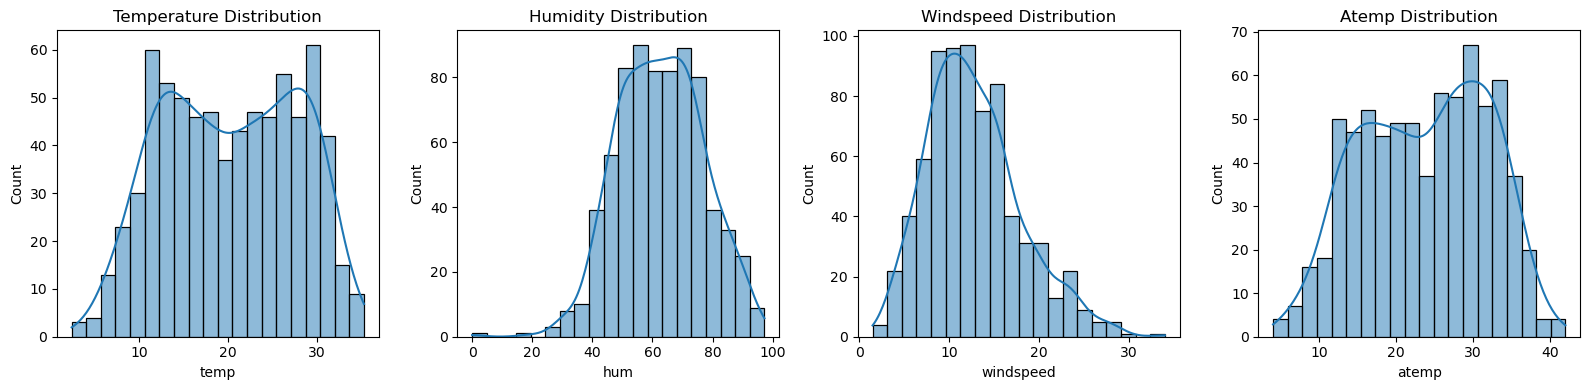

In [254]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
sns.histplot(biking_day["temp"], bins=20, kde=True)
plt.title("Temperature Distribution")

plt.subplot(1, 4, 2)
sns.histplot(biking_day["hum"], bins=20, kde=True)
plt.title("Humidity Distribution")

plt.subplot(1, 4, 3)
sns.histplot(biking_day["windspeed"], bins=20, kde=True)
plt.title("Windspeed Distribution")

plt.subplot(1, 4, 4)
sns.histplot(biking_day["atemp"], bins=20, kde=True)
plt.title("Atemp Distribution")

plt.tight_layout()
plt.show()

##### Findings: Bikes were rented at average of 
-  20 degrees temp.
-  60 humidity
-  windspeed approx 10-12
-  and avg feeling temp of 26 degrees.


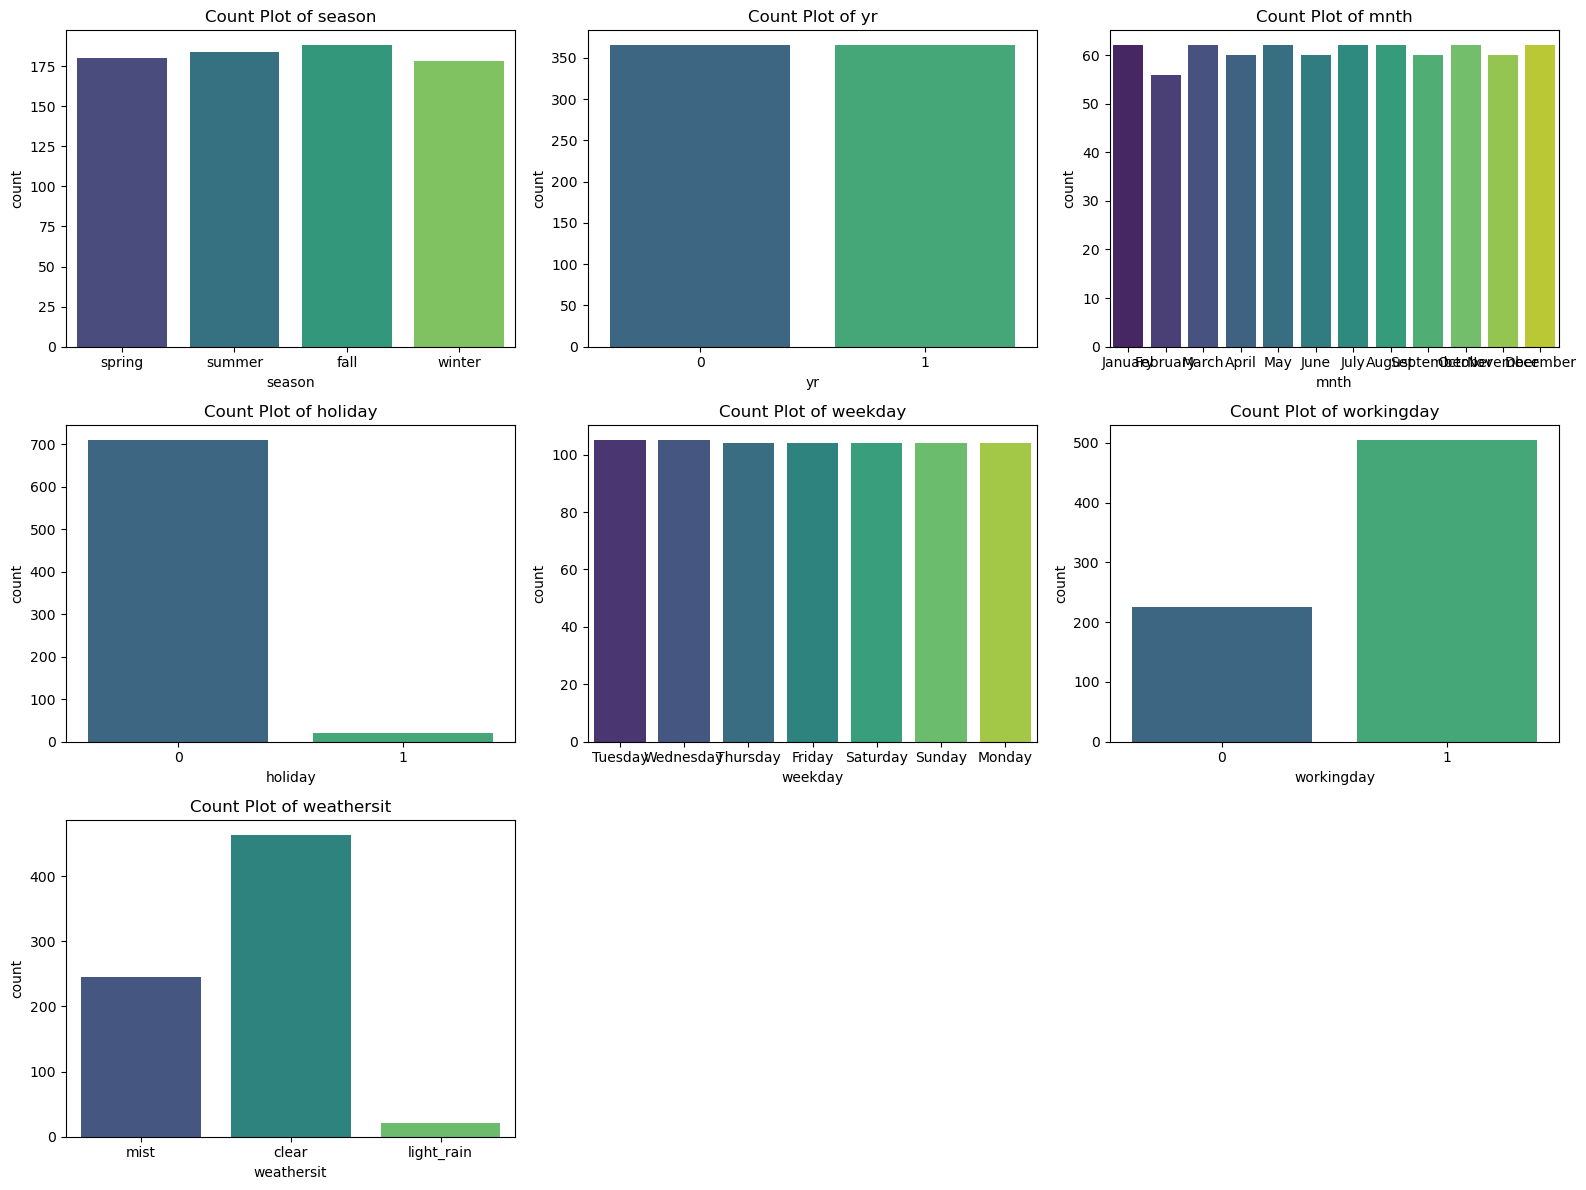

In [256]:
# Analysing for categorical values
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


plt.figure(figsize=(16, 12))


for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  
    sns.countplot(x=var, data=biking_day, palette="viridis")  
    plt.title(f"Count Plot of {var}")

plt.tight_layout()  
plt.show()

##### Findings : Bike rentals are
-  more frequent in favorable weather.
-  prefrence is observed in working days and non-holidays.
-  minimal variation is observed in all other categrical weather.

### Bivariate Analysis 


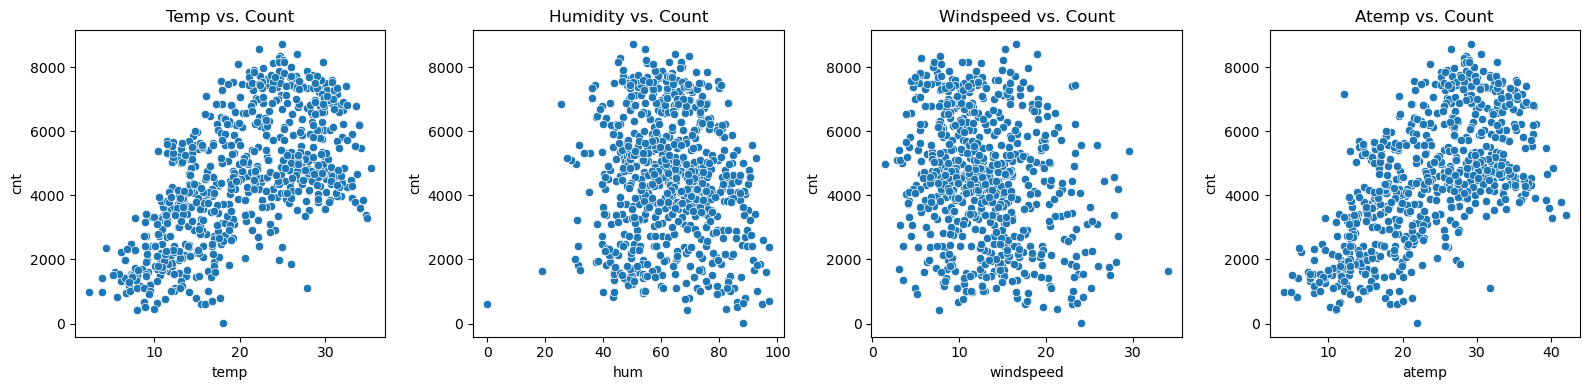

In [259]:
plt.figure(figsize=(16, 4)) 

plt.subplot(1, 4, 1)
sns.scatterplot(x='temp', y='cnt', data=biking_day)
plt.title("Temp vs. Count")

plt.subplot(1, 4, 2)
sns.scatterplot(x='hum', y='cnt', data=biking_day)
plt.title("Humidity vs. Count")

plt.subplot(1, 4, 3)
sns.scatterplot(x='windspeed', y='cnt', data=biking_day)
plt.title("Windspeed vs. Count")

plt.subplot(1, 4, 4)
sns.scatterplot(x='atemp', y='cnt', data=biking_day)
plt.title("Atemp vs. Count")

plt.tight_layout()  
plt.show()

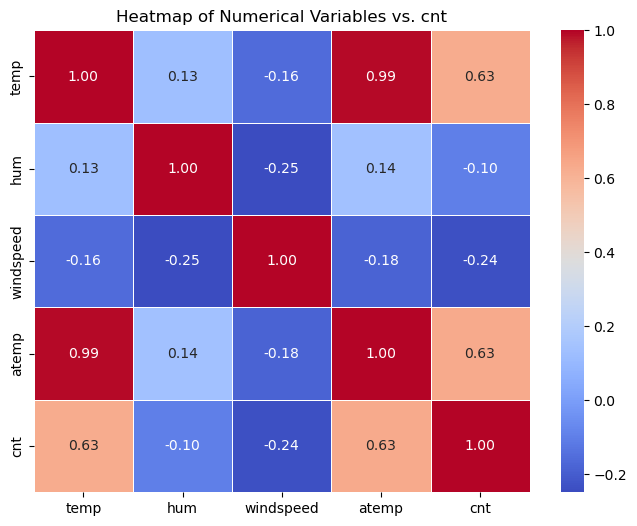

In [260]:
num_vars = ['temp','hum','windspeed','atemp','cnt']
corr_matrix = biking_day[num_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Variables vs. cnt")
plt.show()

##### Findings : 
-  temp and atemp has high corelation with cnt variable, indicating favourable temps improve no of bikers.
-  windspeed and hum is negatively correlated with bike rentals, indicating unfavorable biking conditions

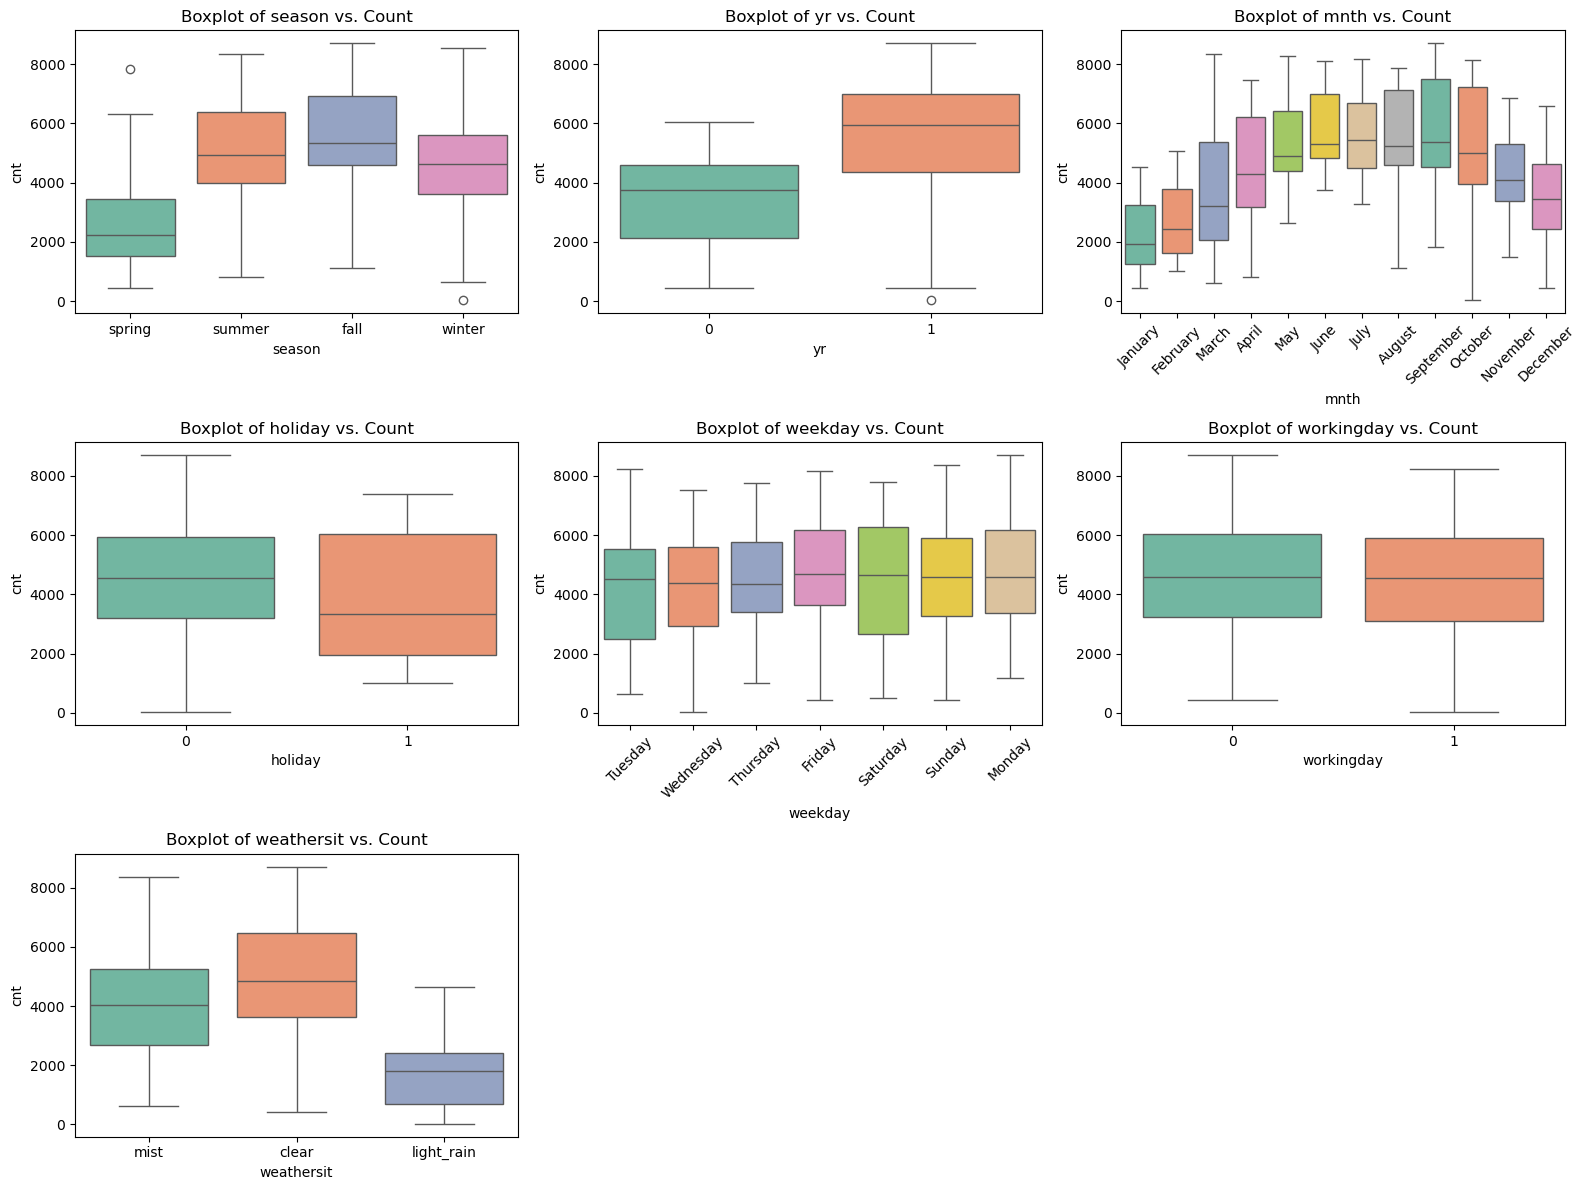

In [262]:
#Analysing for categorical variable

categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(16, 12))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=var, y='cnt', data=biking_day, palette="Set2")  
    plt.title(f"Boxplot of {var} vs. Count")
    

    if var in ['mnth', 'weekday']:
        plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.tight_layout()  
plt.show()

##### Findings:
- Fall season has slightly better rentals than summer
- 2019 had more rentals than 2018
- peak bike rentals occured in july-september.
- bikes were rented more on working days and non-holidays
- high rentals observed in clear weather conditions.

In [264]:
biking_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Tuesday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Wednesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Thursday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Friday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Saturday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation

### Creating dummy variables

#### Dummy variables are only required if the categorical values are more than 2 unique values. They dummy variables are always number of unique values - 1. We can drop any column, but generally, we drop the first column.

In [268]:
biking_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [269]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
biking_day[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

-  Only the categorical variables - **season**, **mnth**, **weekday**, and **weathersit**, among those mentioned, have more than 2 unique values. Dummy variables will be created exclusively for these columns.

In [271]:
biking_day = pd.get_dummies(data = biking_day, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True, prefix = '', prefix_sep = '').astype(int)


-  Dropping the first column in each category (season, mnth, weekday, weathersit) reduces the number of dummy variables to (n - 1) for explaining n categories

In [273]:
# inspecting new data frame
biking_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_rain,mist
0,0,0,1,14,18,80,10,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14,17,69,16,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8,9,43,16,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


In [274]:
#inspecting columns in data frame
biking_day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'light_rain', 'mist'],
      dtype='object')

In [275]:
biking_day.shape

(730, 30)

#### Therefore for model building our data frame will have 730 rows and 30 columns

## Step3 : Model Building 

In [278]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = biking_day.drop('cnt', axis = 1)
y = biking_day['cnt']

#### Spliting the data into train and test sets

In [280]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [281]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 29)
(510,)
(220, 29)
(220,)


In [282]:
# Inspect the head of the training set
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_rain,mist
576,1,0,1,29,33,70,11,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16,20,62,10,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,10,11,48,23,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15,18,48,8,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,13,16,72,14,0,1,0,...,0,0,1,0,0,0,0,0,0,1


#### Rescaling the features using standardscaler

In [284]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [285]:
# Inspect the training set after scaling
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_rain,mist
576,0.984435,-0.161731,0.636364,1.265366,1.238424,0.520323,-0.252017,-0.566783,-0.572822,-0.572822,...,-0.303442,-0.295669,-0.398862,-0.415227,-0.38555,2.528103,-0.428129,-0.424918,-0.174078,-0.725911
426,0.984435,-0.161731,-1.571429,-0.486069,-0.367748,-0.045638,-0.441031,1.764342,-0.572822,-0.572822,...,-0.303442,-0.295669,2.507133,-0.415227,-0.38555,-0.395554,-0.428129,-0.424918,-0.174078,1.377580
728,0.984435,-0.161731,0.636364,-1.294424,-1.479713,-1.036069,2.016140,1.764342,-0.572822,-0.572822,...,-0.303442,-0.295669,-0.398862,-0.415227,-0.38555,-0.395554,2.335743,-0.424918,-0.174078,-0.725911
482,0.984435,-0.161731,-1.571429,-0.620795,-0.614851,-1.036069,-0.819057,-0.566783,1.745743,-0.572822,...,-0.303442,-0.295669,2.507133,-0.415227,-0.38555,-0.395554,-0.428129,-0.424918,-0.174078,1.377580
111,-1.015811,-0.161731,-1.571429,-0.890247,-0.861955,0.661813,0.315022,-0.566783,1.745743,-0.572822,...,-0.303442,-0.295669,2.507133,-0.415227,-0.38555,-0.395554,-0.428129,-0.424918,-0.174078,1.377580


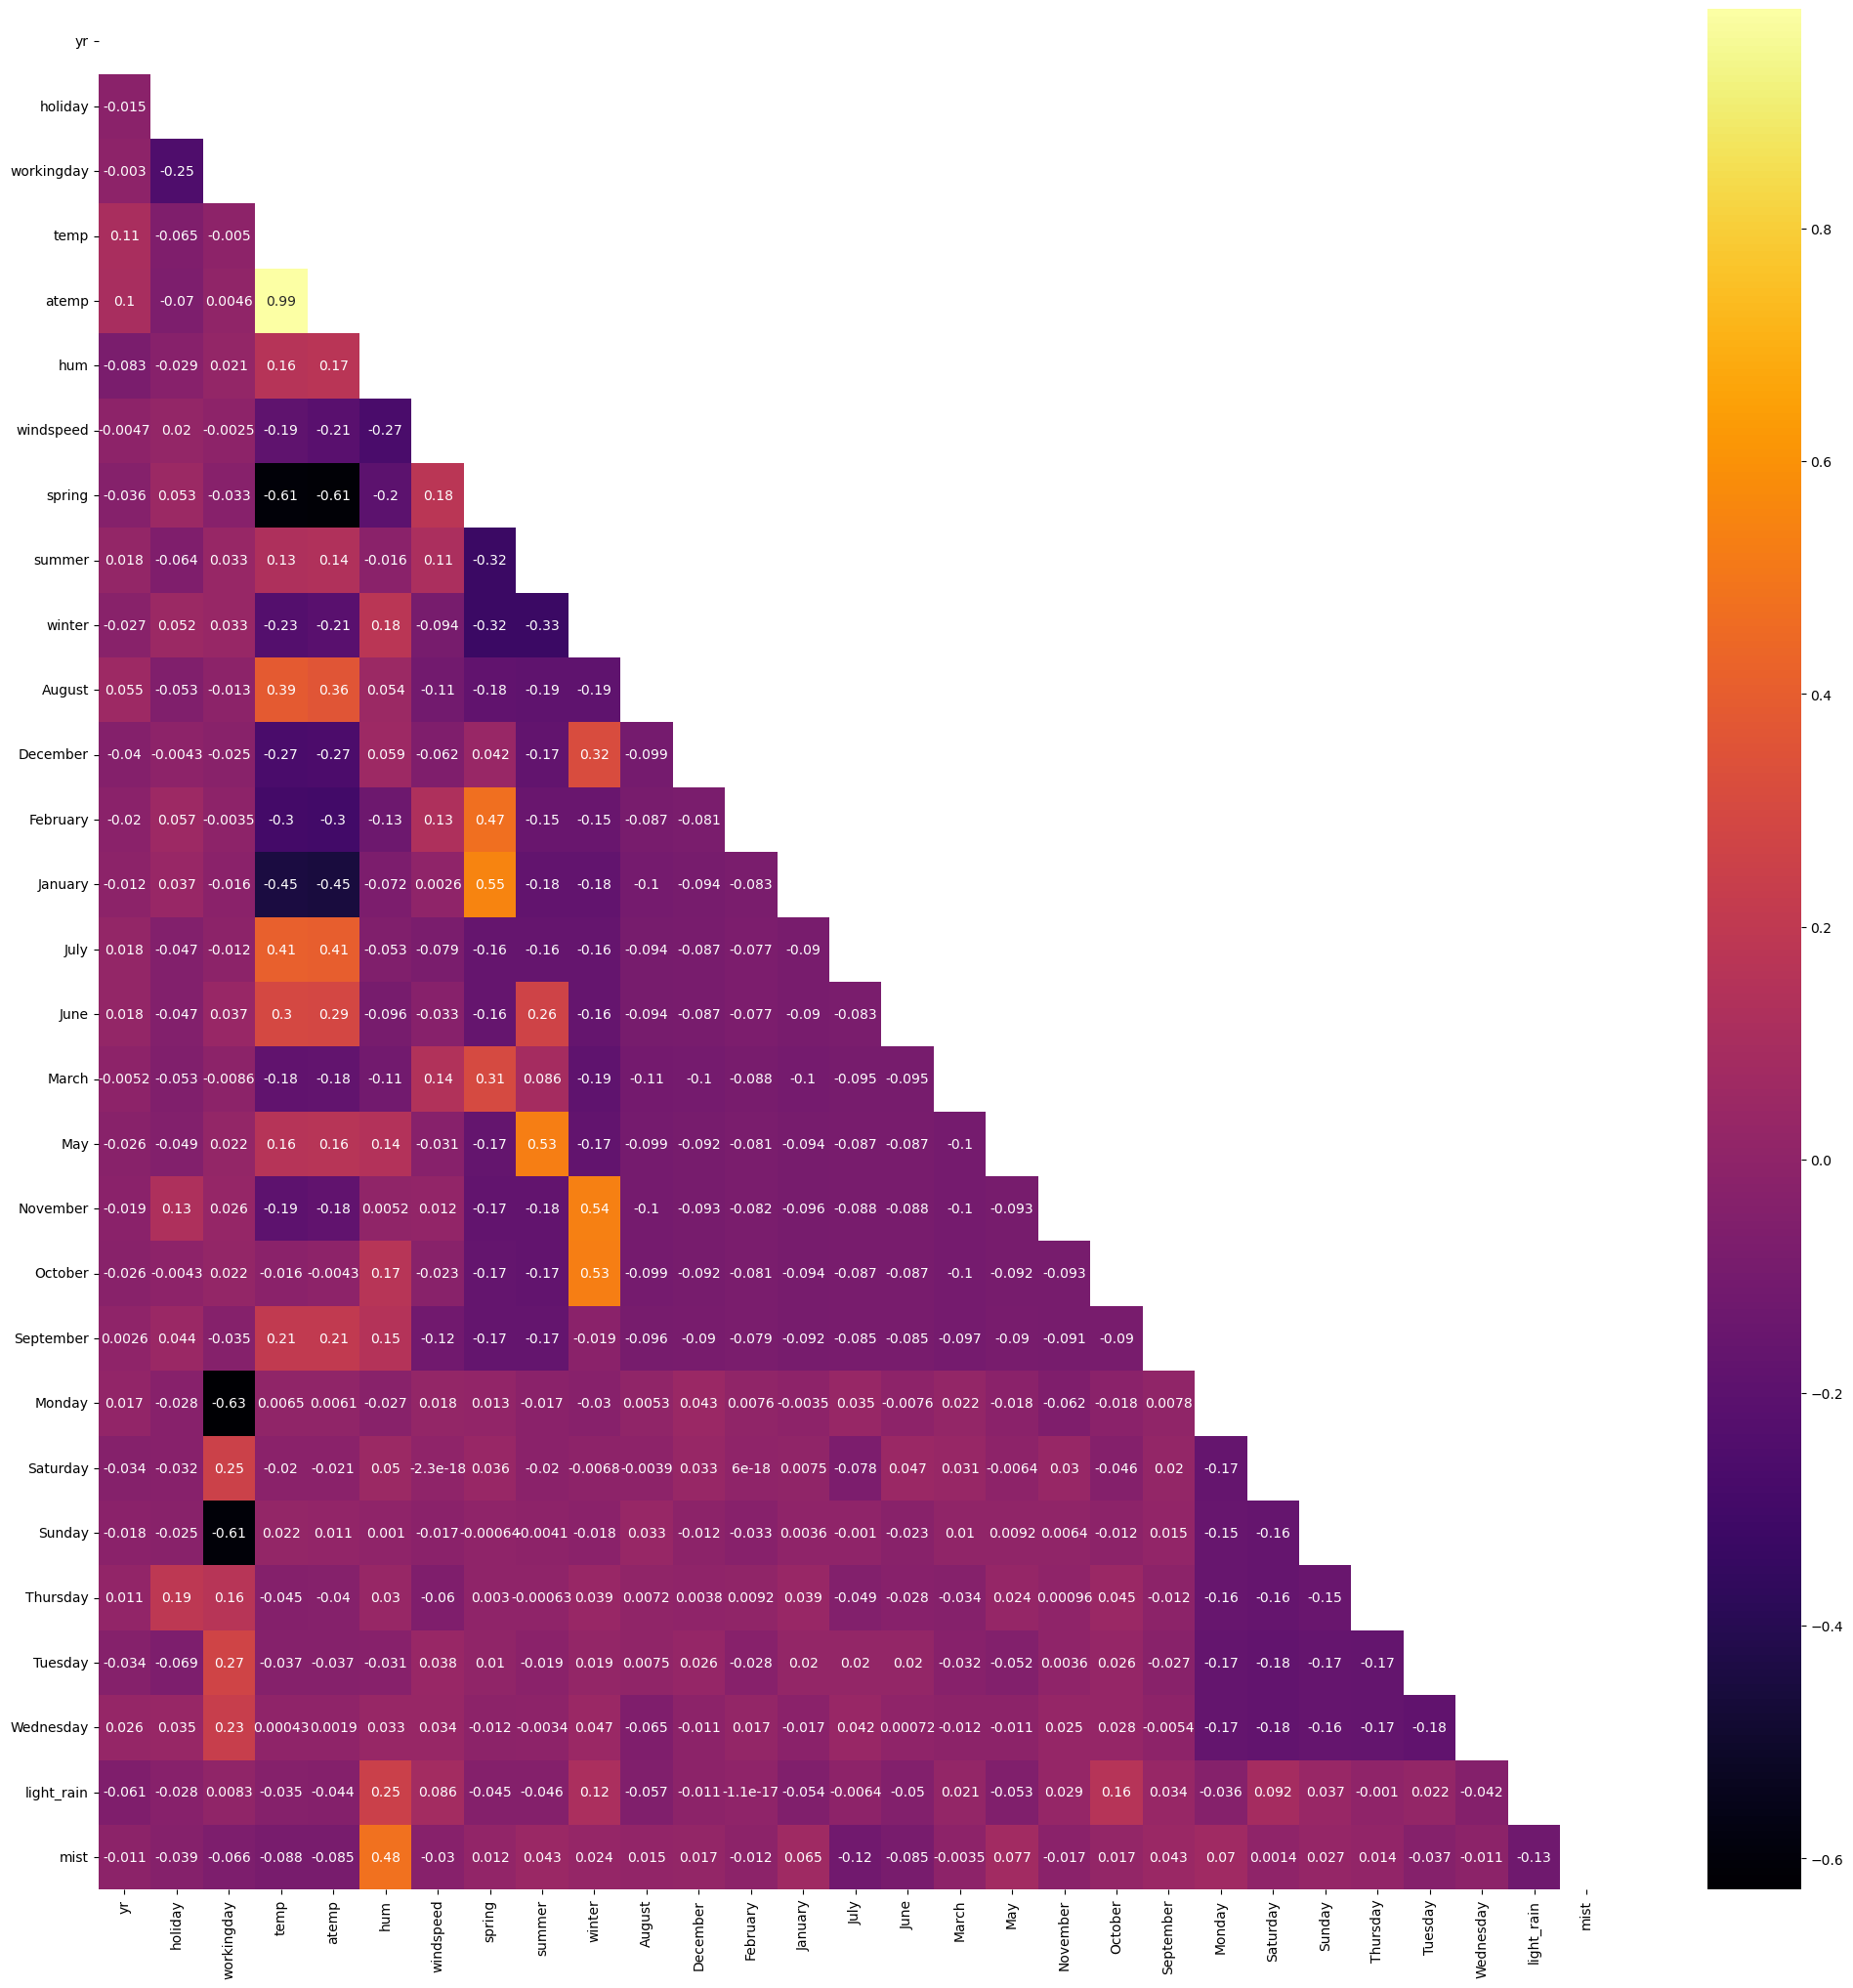

In [286]:
# Inspecting the correlation in the training dataframe
plt.figure(figsize = (25, 25))
matrix = np.triu(X_train_scaled.corr())
sns.heatmap(X_train_scaled.corr(), annot = True, cmap = "inferno", mask = matrix)
plt.show()

-  November and October correlate strongly with Winter.
-  may has a high correaltion with summer
-  hum is positively correalated with miste.

### Selecting Features using Recursive Feature Elimination (RFE) approach

In [289]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [290]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True])

In [291]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', False, 4),
 ('February', False, 6),
 ('January', False, 3),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', False, 5),
 ('October', False, 14),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 13),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 7),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [292]:
# Get the columns which are selected using RFE approach
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'July', 'September', 'Sunday',
       'light_rain', 'mist'],
      dtype='object')

In [293]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train_scaled.columns[~rfe.support_]
rejected_features

Index(['August', 'December', 'February', 'January', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Saturday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Creating functions for future use in model building process

In [295]:
# R-Sqaured
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2
    

In [296]:
# VIF 
def calculate_VIF(X_train):
      vif = pd.DataFrame()
      vif["Features"] = X_train.columns
      vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    
      vif['VIF'] = round(vif['VIF'], 2)
      return vif.sort_values(by = 'VIF', ascending = False)

In [297]:
# OLS Model
def generate_model_with_summary(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }
    

### Manual feature elimination using statsmodel and VIF

#### Model 1

##### creating first models using selected features from rfe

In [301]:
X_train_rfe_1 = X_train_scaled[selected_features]

In [302]:
generate_model_with_summary(X_train_rfe_1, y_train)
calculate_VIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.59e-187
Time:                        15:47:31   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     494   BIC:                             8330.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4485.3373     34.771    128.997      0.0

,Features,VIF
3,temp,51.41
4,atemp,47.65
7,spring,5.06
9,winter,3.57
8,summer,2.71
5,hum,1.91
2,workingday,1.81
12,Sunday,1.68
14,mist,1.58
10,July,1.49


In [303]:
#deleting atemp as it has high p value and vif
X_train_rfe_2 = X_train_rfe_1.drop(['atemp'], axis = 1)

### Model 2

In [305]:
generate_model_with_summary(X_train_rfe_2, y_train)
calculate_VIF(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.45e-188
Time:                        15:47:31   Log-Likelihood:                -4115.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4485.3373     34.756    129.053      0.0

,Features,VIF
6,spring,4.99
3,temp,3.60
8,winter,3.46
7,summer,2.61
4,hum,1.91
2,workingday,1.81
11,Sunday,1.68
13,mist,1.58
9,July,1.49
10,September,1.30


In [306]:
#removing sunday as it has a high p value
X_train_rfe_3 = X_train_rfe_2.drop(['Sunday'], axis = 1)

### Model 3

In [308]:
generate_model_with_summary(X_train_rfe_3, y_train)
calculate_VIF(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.85e-189
Time:                        15:47:31   Log-Likelihood:                -4115.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     496   BIC:                             8318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4485.3373     34.728    129.158      0.0

,Features,VIF
6,spring,4.99
3,temp,3.59
8,winter,3.46
7,summer,2.61
4,hum,1.91
12,mist,1.58
9,July,1.48
10,September,1.30
11,light_rain,1.25
5,windspeed,1.19


In [309]:
# removing spring as it has a high vif value
X_train_rfe_4 = X_train_rfe_3.drop(['spring'], axis = 1)

### Model 4

In [311]:
final_lr_model = generate_model_with_summary(X_train_rfe_4, y_train)
calculate_VIF(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          7.57e-189
Time:                        15:47:31   Log-Likelihood:                -4119.8
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     497   BIC:                             8321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4485.3373     34.983    128.214      0.0

,Features,VIF
4,hum,1.89
3,temp,1.60
11,mist,1.56
8,July,1.43
6,summer,1.33
7,winter,1.29
10,light_rain,1.24
9,September,1.19
5,windspeed,1.18
1,holiday,1.09


In [312]:
X_train_rfe_5 = X_train_rfe_4.drop(['workingday'], axis = 1)

### Model 5

In [314]:
final_lr_model = generate_model_with_summary(X_train_rfe_5, y_train)
calculate_VIF(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.28e-189
Time:                        15:47:32   Log-Likelihood:                -4122.1
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     498   BIC:                             8319.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4485.3373     35.102    127.779      0.0

,Features,VIF
3,hum,1.88
2,temp,1.60
10,mist,1.55
7,July,1.43
5,summer,1.33
6,winter,1.29
9,light_rain,1.24
8,September,1.19
4,windspeed,1.18
0,yr,1.03


##### Model seems satisfactory
> Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis 

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [318]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_lr_model.values()

In [319]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

<Figure size 800x500 with 0 Axes>

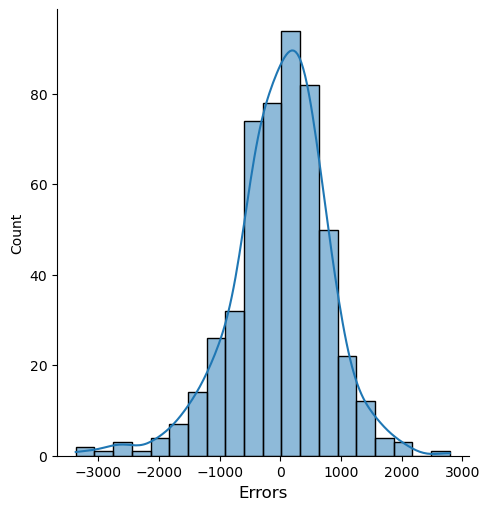

In [320]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

##### Model follows normal distribution curve

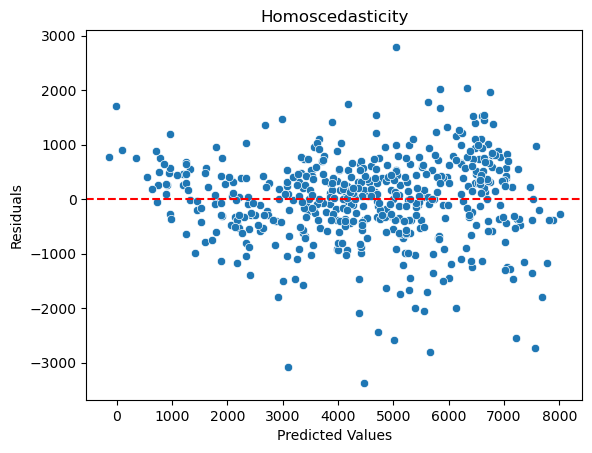

In [322]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

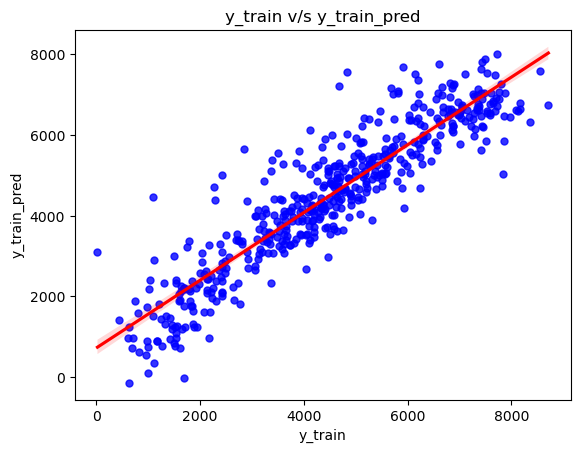

In [323]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

In [324]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8384194665173359

#### The linear model's assumptions hold, indicating it is well-trained and ready for testing on the test set

### Predict Using the Final Model on the test set

In [327]:
# Retain only the selected feature from the final model
X_test_scaled = X_test_scaled[X_train_rfe_5.columns]
X_test_scaled.head()

,yr,holiday,temp,hum,windspeed,summer,winter,July,September,light_rain,mist
184,-1.015811,6.183104,1.265366,0.025108,-1.386096,-0.572822,-0.572822,3.475187,-0.295669,-0.174078,1.377580
535,0.984435,-0.161731,1.669543,-0.257873,-1.008070,1.745743,-0.572822,-0.287754,-0.295669,-0.174078,-0.725911
299,-1.015811,-0.161731,-0.081892,1.298519,0.126009,-0.572822,1.745743,-0.287754,-0.295669,-0.174078,1.377580
221,-1.015811,-0.161731,1.534817,-1.460540,0.126009,-0.572822,-0.572822,-0.287754,-0.295669,-0.174078,-0.725911
152,-1.015811,-0.161731,1.265366,-2.309481,1.260087,1.745743,-0.572822,-0.287754,-0.295669,-0.174078,-0.725911


In [328]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [329]:
# Get the predicted values from the linear model
y_test_pred = model.predict(X_test_sm)

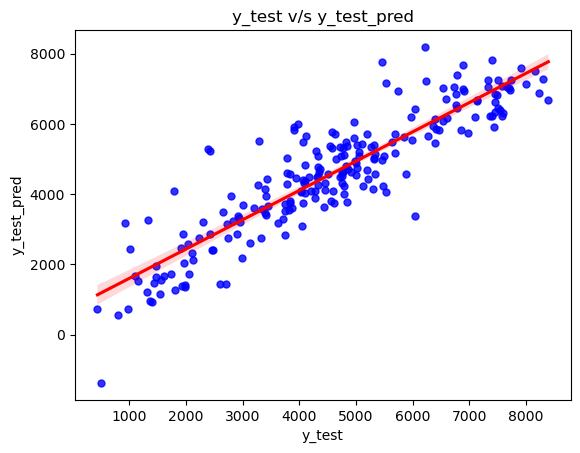

In [330]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

# R2 on final test model

In [332]:
r2_score(y_test, y_test_pred)

0.8016247835124714

In [333]:
# Coefficients of the final model
round(model.params, 2)

const         4485.34
yr             987.69
holiday       -136.08
temp          1169.97
hum           -233.98
windspeed     -275.87
summer         305.50
winter         501.80
July          -106.82
September      228.71
light_rain    -342.63
mist          -209.15
dtype: float64

### We can see the equation of our best fitted line is:
cnt = 4485.34 + 987.69 * yr - 136.08 *holiday + 1169.97 * temp - 233.98 * hum -275.87 * windspeed + 305.50 * summer + 501.80 * winter - 106.82 * july 
      + 228.71 september - 342.63 light_rain - 209.15 mist